In [2]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd

# 30초간격으로 같은 가수에서 3개씩 뽑기
# 30초에 MFCC 뽑은다음 평균 매기기

In [13]:
local_path='C:/Users/wnduq/Desktop/output_music/{}.wav_vocals_vad.wav'
vocal = ['10cm','폴킴','멜로망스','이수','김필','장범준','박효신','Zion.T','잔나비','K.Will']

X = [] #feature저장

for i in range(10):
    song = local_path.format(vocal[i])
    x , sr_x = librosa.load(song)
    x_1, x_2, x_3 = [x[:20000*30], x[20000*30:20000*30*2],x[20000*30*2:20000*30*3]] 
    for j in [x_1, x_2, x_3]:
        mfcc = librosa.feature.mfcc(j,sr=sr_x,n_mels=50, fmax=5000)
        mfcc_mean = list(map(lambda x: np.mean(x),mfcc))
        X.append(mfcc_mean + [vocal[i]])

In [14]:
X = np.array(X)
X.shape
df = pd.DataFrame(X)
singers = df.iloc[:,20]
df = df.iloc[:,:20]
df.shape

(30, 20)

# 22차원 데이터 군집화

In [15]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scaled_X = scale.transform(df)

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 3
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(scaled_X)
predict = pd.DataFrame(model.predict(scaled_X))
predict.columns=['predict']

print(predict)
count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefg'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])

    predict
0         0
1         0
2         2
3         1
4         1
5         0
6         0
7         0
8         0
9         1
10        2
11        0
12        1
13        1
14        0
15        2
16        2
17        2
18        1
19        0
20        0
21        2
22        2
23        2
24        1
25        0
26        0
27        0
28        0
29        0
1번째 군집은 15개
2번째 군집은 7개
3번째 군집은 8개


          pc1         pc2  singer cluster
0    -3.83769    -1.86813    10cm       a
1    -2.71538    -0.70498    10cm       a
2    -1.75017    -3.01334    10cm       c
3     5.75546  0.00124363      폴킴       b
4     4.95383  -0.0481807      폴킴       b
5    -1.88915     2.03201      폴킴       a
6      -1.939     3.08016    멜로망스       a
7    -4.38148     1.95034    멜로망스       a
8    -2.47667     1.61239    멜로망스       a
9     3.47473    0.763082      이수       b
10  -0.102647    -1.33044      이수       c
11   -3.80959    -2.77083      이수       a
12    2.96778    0.376511      김필       b
13    2.72733     2.40156      김필       b
14   -1.06405     1.08881      김필       a
15  0.0426296   -0.121552     장범준       c
16   -1.45867    -2.03848     장범준       c
17  -0.854077    -3.04134     장범준       c
18    5.70172   -0.817634     박효신       b
19   -1.23115   0.0518699     박효신       a
20   0.372428     1.06109     박효신       a
21    1.85822    -3.02694  Zion.T       c
22    1.24111    -2.25752  Zion.T 

,pc1,pc2,singer,cluster


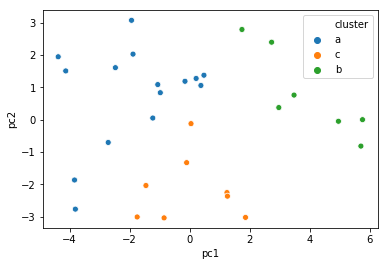

In [17]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,singers, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df)
#plt.savefig('fig3.png', dpi=300)
df[df['cluster']=='d']

# 5초 단위로 평균 매기면??

In [143]:
local_path='C:/Users/wnduq/Desktop/output_music/{}.wav_vocals_vad.wav'
vocal = ['Crush','10cm','이승기','폴킴','테이','환희','KCM','김동률','김연우','멜로망스']
#vocal_eng = ['Crush','10cm','lee-sung-gi','lee-hong-gi','tei','hawn-hui']

X = [] #feature저장

for i in range(len(vocal)):
    song = local_path.format(vocal[i])
    x , sr_x = librosa.load(song)
    x_arr=[]
    
    for k in range(15):
        x_arr.append(x[20000*5*k:20000*5*(k+1)])
    
    for j in x_arr:
        mfcc = librosa.feature.mfcc(j,sr=sr_x,n_mels=100, fmax=5000)
        # n_mel도 중요한 파라미터인듯...
        mfcc_mean = list(map(lambda x: np.mean(x),mfcc))
        X.append(mfcc_mean + [vocal[i]])

In [144]:
X = np.array(X)
X.shape
df = pd.DataFrame(X)
singers = df.iloc[:,20]
df = df.iloc[:,:20]
df.shape

(150, 20)

In [145]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scaled_X = scale.transform(df)

In [146]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 3
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(scaled_X)
predict = pd.DataFrame(model.predict(scaled_X))
predict.columns=['predict']

print(predict)
count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefg'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])

     predict
0          1
1          1
2          1
3          2
4          1
..       ...
145        0
146        0
147        2
148        1
149        2

[150 rows x 1 columns]
1번째 군집은 19개
2번째 군집은 67개
3번째 군집은 64개


          pc1       pc2 singer cluster
0     1.50894  0.976712  Crush       b
1     1.91184  0.898867  Crush       b
2     2.49708   1.50338  Crush       b
3   -0.377294 -0.295465  Crush       c
4     2.64573  0.542732  Crush       b
..        ...       ...    ...     ...
145  -2.85526   1.92609   멜로망스       a
146  -2.98086  0.768316   멜로망스       a
147  -2.32798  0.880377   멜로망스       c
148   1.44567  0.719664   멜로망스       b
149 -0.999687  -1.49501   멜로망스       c

[150 rows x 4 columns]


,pc1,pc2,singer,cluster
3,-0.377294,-0.295465,Crush,c
7,-1.87967,-2.59654,Crush,c
15,-0.392646,0.426015,10cm,c
17,-3.04938,-0.275031,10cm,c
18,-1.97371,-0.89758,10cm,c
...,...,...,...,...
140,-2.14478,-1.59705,멜로망스,c
141,-0.39751,-0.767438,멜로망스,c
142,-1.81827,-0.532258,멜로망스,c
147,-2.32798,0.880377,멜로망스,c


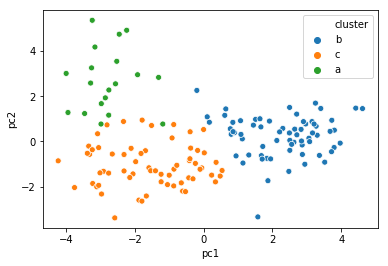

In [150]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,singers, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df)
df[df['cluster']=='c']

# 전체곡에서는??

In [175]:
local_path='C:/Users/wnduq/Desktop/output_music/{}.wav_vocals_vad.wav'
vocal = ['10cm','폴킴','멜로망스','이수','김필','장범준','박효신','Zion.T','잔나비','K.Will']
#vocal_eng = ['Crush','10cm','lee-sung-gi','lee-hong-gi','tei','hawn-hui']

X = [] #feature저장

for i in range(len(vocal)):
    song = local_path.format(vocal[i])
    x , sr_x = librosa.load(song)
    
    mfcc = librosa.feature.mfcc(x,sr=sr_x,n_mels=100, fmax=5000)
    # n_mel도 중요한 파라미터인듯...
    mfcc_mean = list(map(lambda x: np.mean(x),mfcc))
    X.append(mfcc_mean + [vocal[i]])
    

In [176]:
X = np.array(X)
X.shape
df = pd.DataFrame(X)
singers = df.iloc[:,20]
df = df.iloc[:,:20]
df.shape

(10, 20)

In [177]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scaled_X = scale.transform(df)

In [195]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 3
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(scaled_X)
predict = pd.DataFrame(model.predict(scaled_X))
predict.columns=['predict']

print(predict)
count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefg'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])

   predict
0        0
1        0
2        1
3        1
4        0
5        2
6        0
7        2
8        0
9        1
1번째 군집은 5개
2번째 군집은 3개
3번째 군집은 2개


In [205]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=1) #기본값이다.
predict = dbscan.fit_predict(scaled_X)
df["cluster"] = predict
print(df)

        pc1       pc2  singer  cluster
0 -0.198474   3.76975    10cm        0
1   1.63013 -0.475619      폴킴        1
2  -3.98524  0.431085    멜로망스        2
3  -2.24077  -2.70639      이수        3
4 -0.305499  0.709143      김필        1
5   2.05806   -2.6488     장범준        4
6  0.676514    2.3436     박효신        1
7   4.99781 -0.300302  Zion.T        5
8  0.168961 -0.129308     잔나비        1
9  -2.80149  -0.99316  K.Will        2


        pc1       pc2  singer cluster
0 -0.198474   3.76975    10cm       0
1   1.63013 -0.475619      폴킴       1
2  -3.98524  0.431085    멜로망스       2
3  -2.24077  -2.70639      이수       3
4 -0.305499  0.709143      김필       1
5   2.05806   -2.6488     장범준       4
6  0.676514    2.3436     박효신       1
7   4.99781 -0.300302  Zion.T       5
8  0.168961 -0.129308     잔나비       1
9  -2.80149  -0.99316  K.Will       2


,pc1,pc2,singer,cluster
1,1.63013,-0.475619,폴킴,1
4,-0.305499,0.709143,김필,1
6,0.676514,2.3436,박효신,1
8,0.168961,-0.129308,잔나비,1


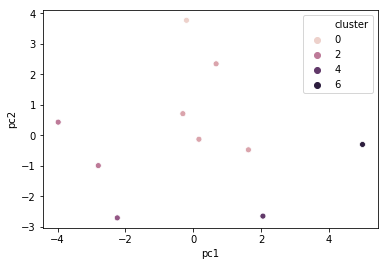

In [215]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,singers, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df)
df[df['cluster']==1]

전체평균으로 봤을 때, 가장 잘되므로 해당가수곡을 와장창 넣으면 될듯....
곡 다 받고 받은 곡에서 새롭게 전처리해서 클러스터링 해본 뒤에
(가수 수를 늘려서 보면 좋을듯...)
DNN 이용해서 분류..

# 1분..

    predict
0         0
1         0
2         1
3         1
4         2
5         2
6         1
7         2
8         1
9         1
10        0
11        0
12        1
13        1
14        1
15        1
16        1
17        1
18        2
19        2
1번째 군집은 4개
2번째 군집은 11개
3번째 군집은 5개
          pc1       pc2  singer cluster
0    -3.63456   2.70036    10cm       a
1    -2.13108   2.84359    10cm       a
2      6.9844  -1.92762      폴킴       b
3    0.693666 -0.528442      폴킴       b
4    -3.90124  -2.35011    멜로망스       c
5    -4.61341  -2.14045    멜로망스       c
6     2.49339 -0.660945      이수       b
7   -0.962446  0.398534      이수       c
8     3.76201  -1.57029      김필       b
9    0.326916  -1.01759      김필       b
10  -0.395935   2.40413     장범준       a
11  -0.791979   2.72448     장범준       a
12    2.96645  0.197076     박효신       b
13  0.0350506 -0.606762     박효신       b
14     2.5121    2.8733  Zion.T       b
15    2.11063   3.11473  Zion.T       b
16    1.05222  -1.98293     잔나비   

,pc1,pc2,singer,cluster


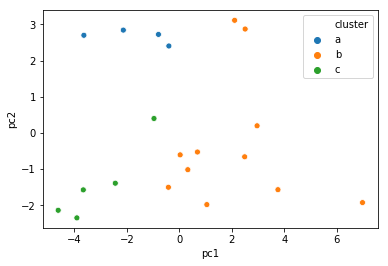

In [3]:
local_path='C:/Users/wnduq/Desktop/output_music/{}.wav_vocals_vad.wav'
vocal = ['10cm','폴킴','멜로망스','이수','김필','장범준','박효신','Zion.T','잔나비','K.Will']

X = [] #feature저장

for i in range(10):
    song = local_path.format(vocal[i])
    x , sr_x = librosa.load(song)
    x_1, x_2 = [x[:20000*60], x[20000*30:20000*60*2]] 
    for j in [x_1, x_2]:
        mfcc = librosa.feature.mfcc(j,sr=sr_x,n_mels=50, fmax=5000)
        mfcc_mean = list(map(lambda x: np.mean(x),mfcc))
        X.append(mfcc_mean + [vocal[i]])
X = np.array(X)
X.shape
df = pd.DataFrame(X)
singers = df.iloc[:,20]
df = df.iloc[:,:20]
df.shape
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scaled_X = scale.transform(df)
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 3
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(scaled_X)
predict = pd.DataFrame(model.predict(scaled_X))
predict.columns=['predict']

print(predict)
count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefg'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,singers, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df)
#plt.savefig('fig3.png', dpi=300)
df[df['cluster']=='d']